# Linear Regression with Python

### Simple Linear Regression


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

​

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


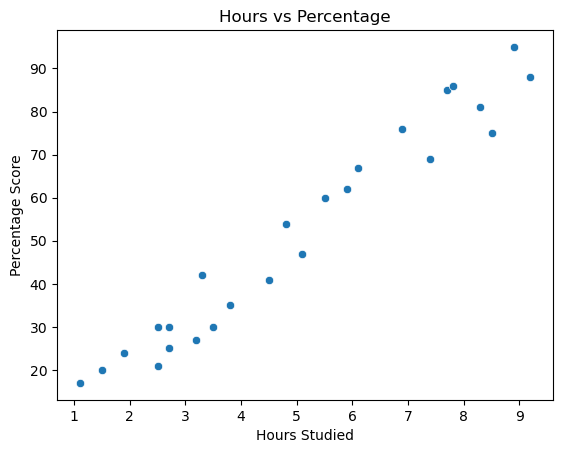

In [3]:
sns.scatterplot(data=data,x='Hours', y='Scores')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

* From above graph we see the Positive linear relationship between Percentage score and Hours Studies

# Perparation The Data

In [4]:
X = data.iloc[:, :-1]  
y = data.iloc[:, 1] 

This will select all columns except the last one as X (features) and the Second column as y (target)

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18, 1)
(18,)
(7, 1)
(7,)


In [7]:
from statsmodels.api import add_constant,OLS
X=add_constant(X)
model=OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           9.13e-17
Time:                        08:45:21   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* OLS model is good model

* Above Summary we have good R_squared score 

## * Training the Data in Algorithm

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


## * Evaluting Model 

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score


print('Mean Absolute Percentage Error:',
      mean_absolute_percentage_error(y_test,y_pred))

print('Mean Absolute Error:', 
      mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',
      mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R_Square:',r2_score(y_test,y_pred))

Mean Absolute Percentage Error: 0.1283906350228135
Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Square Error: 4.5092043283688055
R_Square: 0.9367661043365055
